In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

**EDA**

In [20]:
df = pd.read_csv("data\heart_disease_uci.csv")
df.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


**About the Target**
<pre>Target : num
0 = no heart disease
1 = mild heart disease
2 = moderate heart disease
3 = severe heart disease
4 = critical heart disease</pre>

In [22]:
df.isna().sum()#NaN values per column

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [23]:
((df.isna().sum()/len(df))*100).sort_values(ascending = False)
#percentage of values that are "NaN" per column

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
exang        5.978261
thalch       5.978261
chol         3.260870
restecg      0.217391
cp           0.000000
dataset      0.000000
id           0.000000
age          0.000000
sex          0.000000
num          0.000000
dtype: float64

In [24]:
#dropping "ca" and "thal" as most of the values are NaN.
#dropping "id","dataset" as they are not usefull.
df.drop(columns = ["ca","thal","id","dataset"], inplace = True, errors = "ignore")
#errors = "ignore" to ignore key error on 2nd run
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  num       920 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 86.4+ KB


In [25]:
cat_features = ["sex","cp", "fbs", "restecg", "exang", "slope"]
non_cat_features = ["age", "trestbps", "chol", "thalch", "oldpeak"]

In [26]:
print("Number of outliers per column:")
for col in non_cat_features:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    outliers = ((df[col] >= ub) | (df[col] <= lb)).sum()
    print(f"{col}: {outliers}")

Number of outliers per column:
age: 0
trestbps: 42
chol: 183
thalch: 2
oldpeak: 16


In [27]:
#using median replacement
df[non_cat_features] = df[non_cat_features].fillna(df[non_cat_features].median())
# the above wont work for mode, as mode() returns an array of frequency for each category
for col in cat_features:
    df[col] = df[col].fillna(df[col].mode()[0]).infer_objects(copy = False)
#infer_objects converts non-object columns typed as "objects" into their respective dtype
#copy = False => inplace
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    bool   
 6   restecg   920 non-null    object 
 7   thalch    920 non-null    float64
 8   exang     920 non-null    bool   
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    object 
 11  num       920 non-null    int64  
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 73.8+ KB


C:\Users\shree\AppData\Local\Temp\ipykernel_21928\607131246.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0]).infer_objects(copy = False)


In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0


<i>**Checking for Bias in Target**</i>

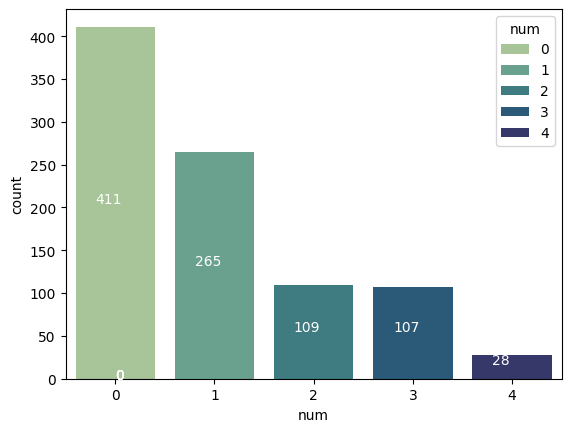

In [29]:
ax = sns.countplot(data = df, x = "num", hue = "num", palette = "crest")
bars = ax.patches
for bar in bars:
    c = bar.get_x()#left edge of the bar
    h = bar.get_height()
    w = bar.get_width()
    ax.text(c + w/4, c + h/2, f"{int(h)}", color = "white")


In [30]:
df = pd.get_dummies(data = df, prefix = cat_features, columns = cat_features, drop_first = True)
df

,age,trestbps,chol,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping
0,63,145.0,233.0,150.0,2.3,0,True,False,False,True,True,False,False,False,False,False
1,67,160.0,286.0,108.0,1.5,2,True,False,False,False,False,False,False,True,True,False
2,67,120.0,229.0,129.0,2.6,1,True,False,False,False,False,False,False,True,True,False
3,37,130.0,250.0,187.0,3.5,0,True,False,True,False,False,True,False,False,False,False
4,41,130.0,204.0,172.0,1.4,0,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,127.0,333.0,154.0,0.0,1,False,False,False,False,True,False,True,False,True,False
916,62,130.0,139.0,140.0,0.5,0,True,False,False,True,False,False,True,False,True,False
917,55,122.0,223.0,100.0,0.0,2,True,False,False,False,True,False,True,False,True,False
918,58,130.0,385.0,140.0,0.5,0,True,False,False,False,True,False,False,False,True,False


In [33]:
X = df.drop(columns = ["num"])
Y = df["num"]

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state = 55)
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

**Naive randomforest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
params_grid = {
    "n_estimators": [90,100, 125, 150],
    "max_depth": [6, 8, 10, 12],
    "min_samples_split": [2,3,4,5,6],
}
model = RandomForestClassifier(random_state = 55)
grid_search = GridSearchCV(model , params_grid, scoring = "accuracy", cv = 5, n_jobs = 4,)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
print(classification_report(y_test, best_model.predict(x_test)))


              precision    recall  f1-score   support

           0       0.75      0.90      0.82        84
           1       0.48      0.56      0.52        52
           2       0.46      0.30      0.36        20
           3       0.38      0.12      0.18        25
           4       1.00      0.33      0.50         3

    accuracy                           0.62       184
   macro avg       0.61      0.44      0.48       184
weighted avg       0.59      0.62      0.59       184



**Observation:**
<pre>Model performs well for class 0
Model performs poorly for class 1, 2, 3 ,4 due to low support and recall
overall accuracy = 62 %</pre>